### 卷积神经网络应用与MNIST数据集分类

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam

In [7]:
#载入数据
mnist=tf.keras.datasets.mnist
#载入数据，划分好训练集和测试集
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
#做卷积时要把数据reshape变成四维数据(数据数量、图片高度、图片宽度、图片通道数)
x_train=x_train.reshape(-1,28,28,1)/255.0
x_test=x_test.reshape(-1,28,28,1)/255.0
print(x_train.shape)
#把训练集和测试集的标签转为独热编码
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)

#定义顺序模型
model=Sequential()
#第一个卷积层
model.add(Convolution2D(
    input_shape=(28,28,1),
    filters=32,
    kernel_size=5,
    strides=1,
    padding='same',
    activation='relu'
))
#第一个池化层
model.add(MaxPooling2D(
    pool_size=2,
    strides=2,
    padding='same'
))
#第二个卷积层
model.add(Convolution2D(
filters=64,
kernel_size=5,
strides=1,
padding='same',
activation='relu'))
#第二个池化层
model.add(MaxPooling2D(2,2,'same'))
#把第二个池化层的输出进行数据扁平化
model.add(Flatten())
#第一个全连接层
#Dense：全连接层,1024个输入神经元
model.add(Dense(1024,activation='relu'))
#Dropout，防止过拟合，在前向传播过程中，让某个神经元的激活值以一定的概率停止工作
model.add(Dropout(0.5))
#第二个全连接层，10个输出神经元
model.add(Dense(10,activation='softmax'))
#定义优化器+

adam=Adam(lr=1e-4)
#定义优化器，loss function，训练过程中计算准确率
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
#训练模型
model.fit(x_train,y_train,batch_size=64,epochs=10,validation_data=(x_test,y_test))


(60000, 28, 28)
(60000, 28, 28, 1)
Epoch 1/10
938/938 [==============================] - 124s 132ms/step - loss: 0.3320 - accuracy: 0.9064 - val_loss: 0.0954 - val_accuracy: 0.9708
Epoch 2/10
938/938 [==============================] - 107s 114ms/step - loss: 0.0948 - accuracy: 0.9714 - val_loss: 0.0548 - val_accuracy: 0.9828
Epoch 3/10
938/938 [==============================] - 111s 119ms/step - loss: 0.0669 - accuracy: 0.9793 - val_loss: 0.0406 - val_accuracy: 0.9855
Epoch 4/10
938/938 [==============================] - 113s 120ms/step - loss: 0.0536 - accuracy: 0.9833 - val_loss: 0.0319 - val_accuracy: 0.9899
Epoch 5/10
938/938 [==============================] - 111s 118ms/step - loss: 0.0444 - accuracy: 0.9858 - val_loss: 0.0309 - val_accuracy: 0.9895
Epoch 6/10
938/938 [==============================] - 117s 125ms/step - loss: 0.0376 - accuracy: 0.9885 - val_loss: 0.0305 - val_accuracy: 0.9894
Epoch 7/10
938/938 [==============================] - 118s 125ms/step - loss: 0.0326 - ac

model.compile (optimizer=Adam(lr=1e-4), loss=’binary_crossentropy’, metrics=[‘accuracy’])

optimizer：优化器，如Adam

loss：计算损失，这里用的是交叉熵损失

metrics: 列表，包含评估模型在训练和测试时的性能的指标，典型用法是metrics=[‘accuracy’]。如果要在多输出模型中为不同的输出指定不同的指标，可向该参数传递一个字典，例如metrics={‘output_a’: ‘accuracy’}


In [7]:
model.save('mnist.h5')

NameError: name 'model' is not defined

In [6]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt 
from PIL import Image
import numpy as np

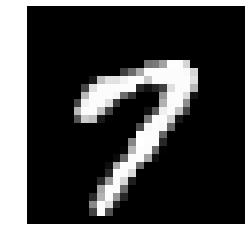

In [10]:
#载入数据
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#获取一张照片，并把它的shape变成二维，并用灰度图显示
plt.imshow(x_train[15],cmap='gray')
#不显示坐标
plt.axis('off')
plt.show()

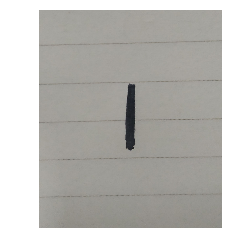

In [9]:
#载入我自己写的数字图片
img=Image.open('K:/1.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

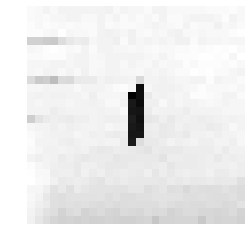

In [11]:
#img.convert('L')为灰度图像，每个像素用8个bit表示
image=np.array(img.resize((28,28)).convert('L'))
plt.imshow(image,cmap='gray')
#不显示坐标
plt.axis('off')
plt.show()
                                           

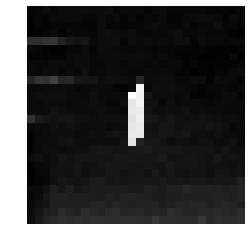

In [12]:
image=(255-image)/255.0
plt.imshow(image,cmap='gray')
plt.axis('off')
plt.show()

In [13]:
image=image.reshape((1,28,28,1))
model=load_model('mnist.h5')
prediction=model.predict_classes(image)
print(prediction)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[3]


In [14]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

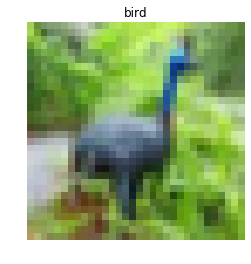

In [26]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
# 下载并载入数据
# 训练集数据(50000, 32, 32, 3)
# 测试集数据(50000, 1)
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
# 显示 1 张图片
# 第 3 张图片
n = 6
# 一共 10 个种类
target_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
# 显示图片
plt.imshow(x_train[n])
plt.axis('off')
# 根据标签获得种类名称
plt.title(target_name[y_train[n][0]])
plt.show()


In [27]:
#数据归一化
x_train=x_train/255.0
x_test=x_test/255.0
#转 one hot 格式
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)
    
#共7层
# 定义卷积网络
model = Sequential()
model.add(Convolution2D(input_shape=(32,32,3), filters=32, kernel_size=3, strides=1, padding='same', activation = 'relu'))
model.add(Convolution2D(filters=32, kernel_size=3, strides=1, padding='same', activation =
'relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model.add(Dropout(0.2))
model.add(Convolution2D(filters=64, kernel_size=3, strides=1, padding='same', activation =
'relu'))
model.add(Convolution2D(filters=64, kernel_size=3, strides=1, padding='same', activation =
'relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model.add(Dropout(0.3))
model.add(Convolution2D(filters=128, kernel_size=3, strides=1, padding='same', activation
= 'relu'))
model.add(Convolution2D(filters=128, kernel_size=3, strides=1, padding='same', activation
= 'relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='valid'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'+
               ))
# 定义优化器
adam = Adam(lr=1e-4)
# 定义优化器，loss function，训练过程中计算准确率
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
# 训练模型
model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/100
782/782 [==============================] - 201s 257ms/step - loss: 1.8950 - accuracy: 0.2953 - val_loss: 1.6242 - val_accuracy: 0.4044
Epoch 2/100
782/782 [==============================] - 198s 253ms/step - loss: 1.5943 - accuracy: 0.4152 - val_loss: 1.4710 - val_accuracy: 0.4657
Epoch 3/100
782/782 [==============================] - 212s 271ms/step - loss: 1.4653 - accuracy: 0.4645 - val_loss: 1.3542 - val_accuracy: 0.5131
Epoch 4/100
782/782 [==============================] - 219s 280ms/step - loss: 1.3746 - accuracy: 0.5023 - val_loss: 1.2825 - val_accuracy: 0.5436
Epoch 5/100
782/782 [==============================] - 232s 297ms/step - loss: 1.2969 - accuracy: 0.5351 - val_loss: 1.1947 - val_accuracy: 0.5799
Epoch 6/100
782/782 [==============================] - 181s 231ms/step - loss: 1.2342 - accuracy: 0.5607 - val_loss: 1.1416 - val_accuracy: 0.5989
Epoch 7/100
782/782 [==============================] - 179s 230ms/step - loss: 1.1730 - accuracy: 0.5825 - val_loss: 1

ResourceExhaustedError:  OOM when allocating tensor with shape[73,256,288] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node gradient_tape/sequential_4/conv2d_26/Conv2D/Conv2DBackpropFilter (defined at <ipython-input-27-95138ae397c5>:35) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_4493]

Function call stack:
train_function
